In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('../data/smartphone_data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
#feature engineering:
df['resolution'] = df['px_height'] * df['px_width']
fdf = df.drop(['px_height' , 'px_width'] , axis =1)
fdf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,resolution
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1,1464096


<Axes: xlabel='price_range', ylabel='Count'>

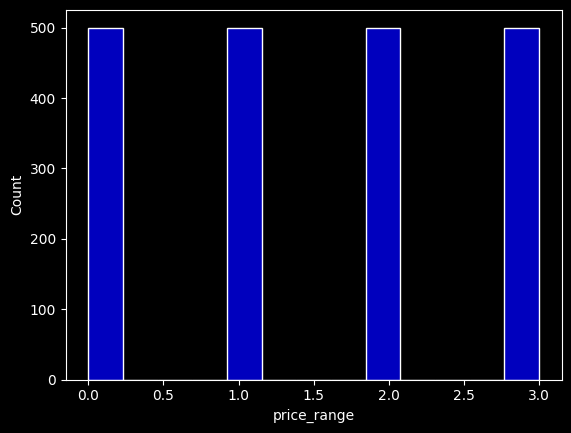

In [8]:
# check class distribution of the target variable
sns.histplot(fdf , x = 'price_range' , color = 'blue')

<Axes: >

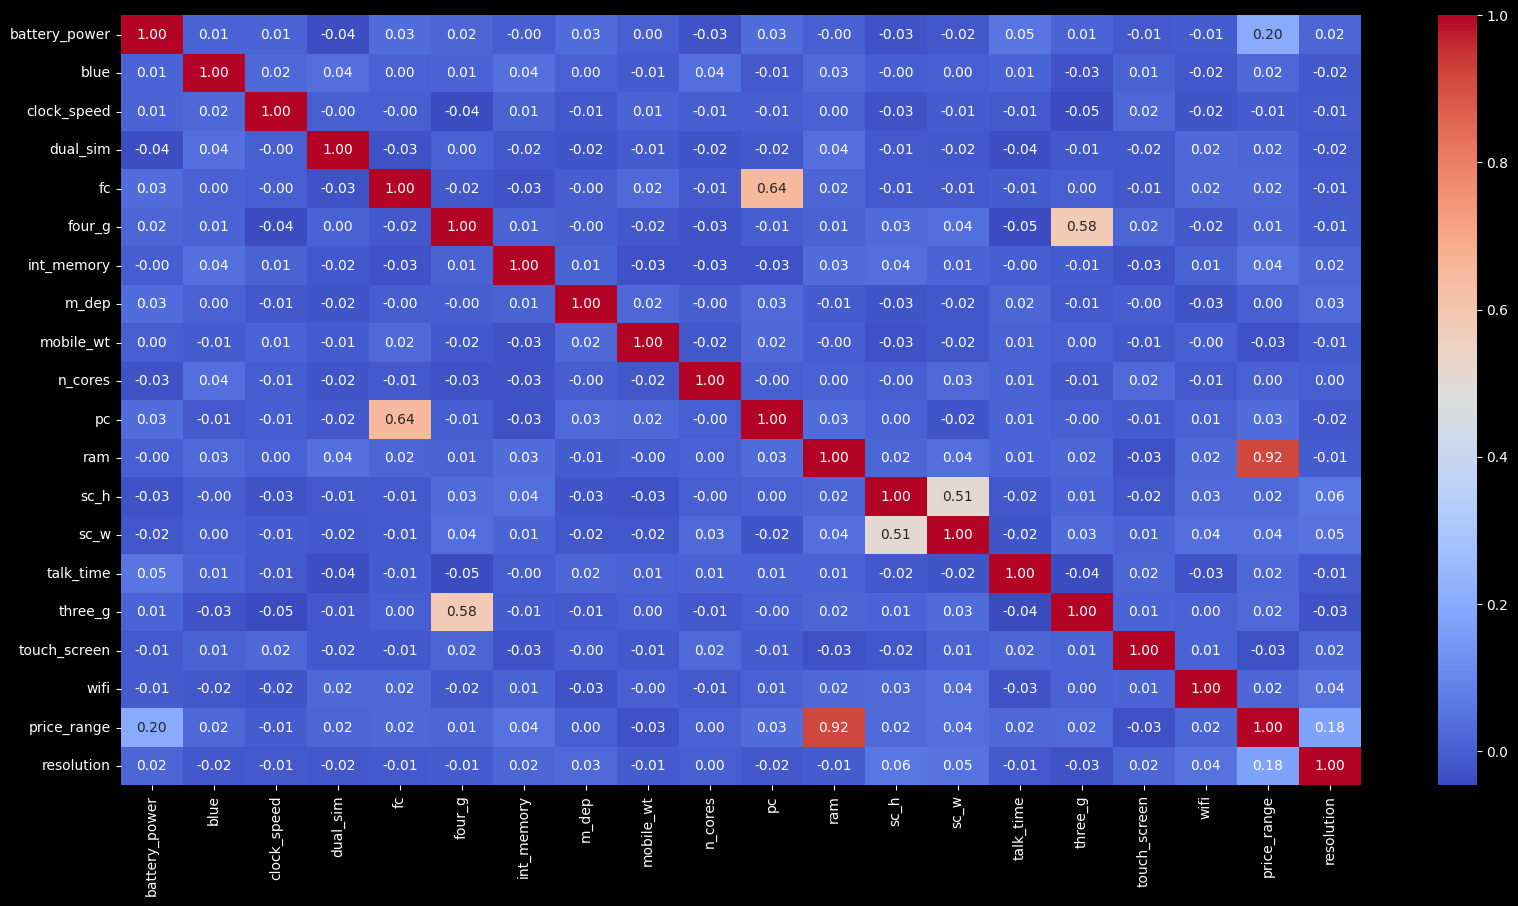

In [21]:
# correlation heatmap
plt.figure(figsize = (20 , 10))
sns.heatmap(fdf.corr() , annot = True , fmt = '.2f' , cmap = 'coolwarm')

In [22]:
# class wise statistics for target variable
fdf.groupby('price_range').mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,resolution
price_range,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,785.314,12.324,5.682,10.612,0.746,0.524,0.496,678837.798
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,1679.490,12.212,5.544,11.362,0.756,0.522,0.504,930234.068
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,2582.816,12.010,5.714,10.972,0.774,0.470,0.504,880749.466
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,3449.232,12.680,6.128,11.098,0.770,0.496,0.524,1131218.882


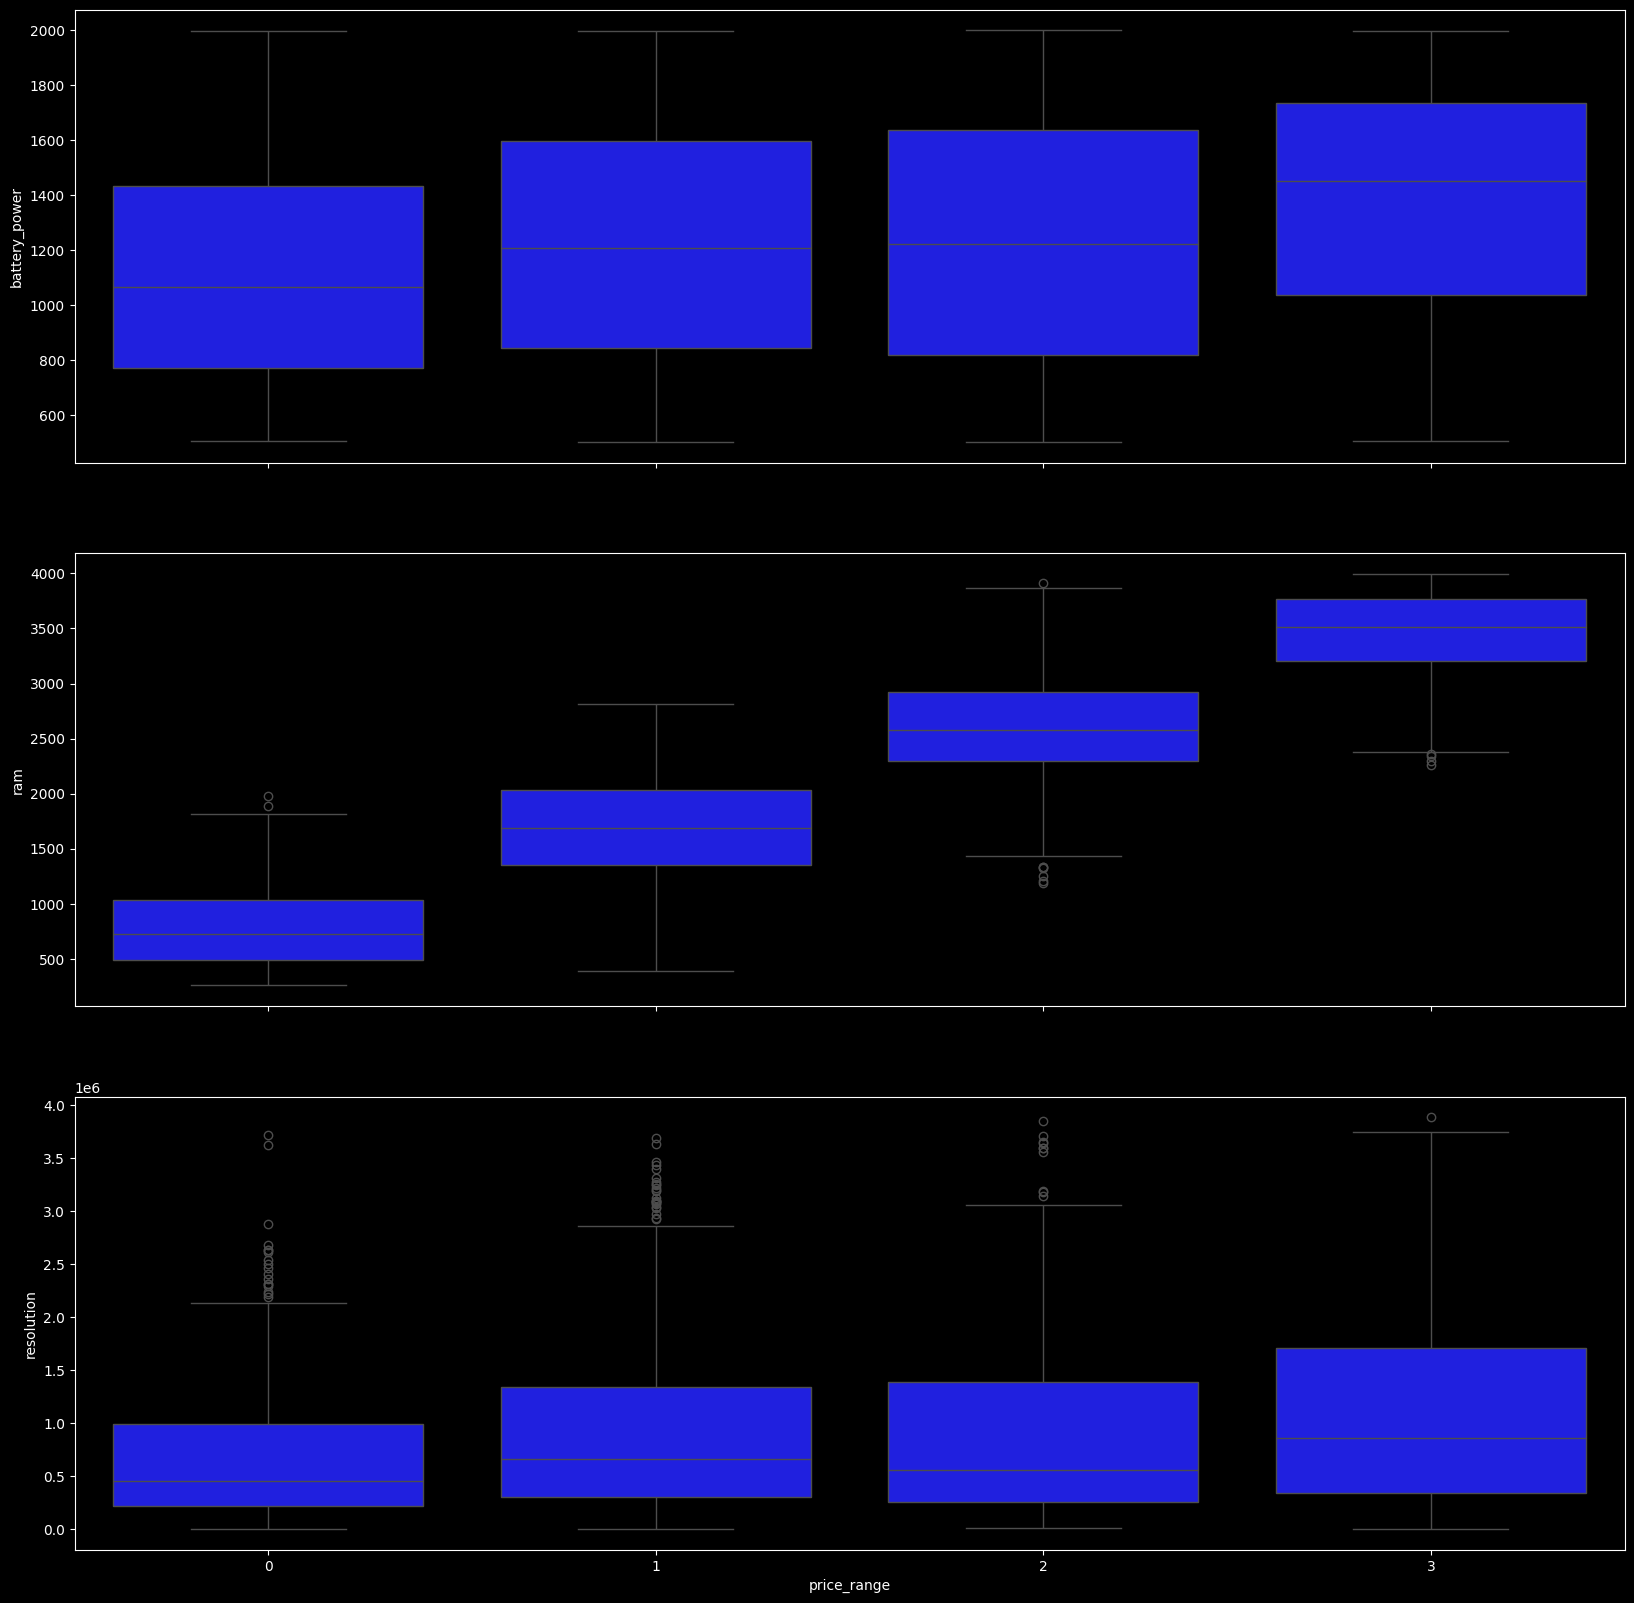

In [33]:
# visualize battery_power , ram and resolution against price_range
columns = ['battery_power' , 'ram' , 'resolution']
fig , axis = plt.subplots(len(columns) , 1 , figsize = (20 , 20) , sharex = True)
# print(axis)
for i in range(len(columns)):
    col = columns[i]
    plt.sca(axis[i])
    sns.boxplot(fdf , x = 'price_range' , y = col , color = 'blue')
plt.show()


In [34]:
# data scaling and train_test_split:
x = fdf.drop('price_range' , axis = 1)
y = fdf['price_range']

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
xscaled = scaler.fit_transform(x)
xscaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.00601811,
         0.98609664, -1.07303316],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  1.07754147],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  1.52135531],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.99401789,
        -1.01409939,  0.61637375],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.99401789,
         0.98609664, -0.81988539],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.99401789,
         0.98609664, -0.65225095]])

In [39]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [40]:
xtrain , xtest , ytrain , ytest = train_test_split(xscaled , y , test_size=0.2 , random_state= 42 , stratify=y)
xtrain.shape , ytrain.shape , xtest.shape , ytest.shape

((1600, 19), (1600,), (400, 19), (400,))

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Dictionary to store models and their names
models = {
    'Linear': SVC(kernel='linear', C=1),#Regularization parameter.
    'RBF': SVC(kernel='rbf', C=1),
    'Polynomial': SVC(kernel='poly', degree=3, C=1),
    'Sigmoid': SVC(kernel='sigmoid', C=1)
}

for name , model in models.items():
    model.fit(xtrain , ytrain)
    ypred = model.predict(xtest)
    print(f"{name} kernel , accuracy: {accuracy_score(ytest , ypred)}")

Linear kernel , accuracy: 0.9375
RBF kernel , accuracy: 0.8675
Polynomial kernel , accuracy: 0.7925
Sigmoid kernel , accuracy: 0.925


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.95      0.91      0.93       100
           2       0.91      0.91      0.91       100
           3       0.93      0.96      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



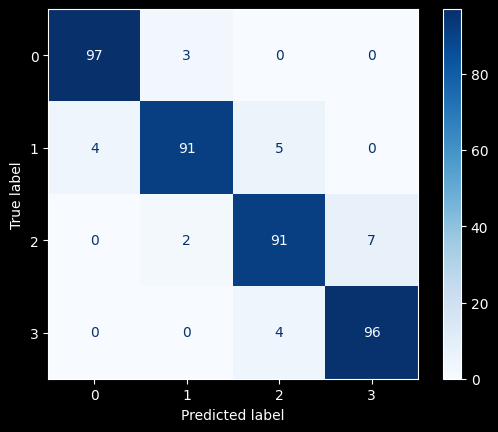

In [46]:
# choose best model and print its classification report and confusion matrix -> linear model has highest accuracy
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay

bmodel = SVC(kernel = 'linear' , C = 1)
bmodel.fit(xtrain , ytrain)
ypred = bmodel.predict(xtest)
cr = classification_report(ytest , ypred)
confmat = confusion_matrix(ytest , ypred)

print(cr)
disp = ConfusionMatrixDisplay(confmat)
disp.plot(cmap = plt.cm.Blues)

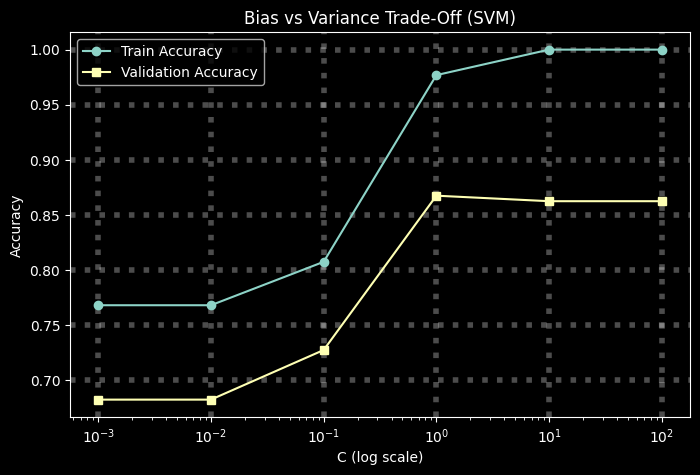

In [55]:
train_scores = []
val_scores = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    model = SVC(kernel='rbf', C=C)#Regularization parameter.
    model.fit(xtrain, ytrain)

    # Accuracy on train and validation sets
    train_score = model.score(xtrain, ytrain)
    val_score = model.score(xtest, ytest)

    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(C_values, val_scores, marker='s', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("Bias vs Variance Trade-Off (SVM)")
plt.legend()
plt.grid(linestyle = ':' , alpha = 0.3 , linewidth = 4)
plt.show()


In [58]:
import tensorflow_datasets as tfds

In [59]:
rdata = tfds.load('cats_vs_dogs' , split = 'train[:10%]' , as_supervised= True)
rdata

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Shuffling /Users/sanketmishra/tensorflow_datasets/cats_vs_dogs/incomplete.KOU2S4_4.0.1/cats_vs_dogs-train.tfre…

Dataset cats_vs_dogs downloaded and prepared to /Users/sanketmishra/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [64]:
# preprocess and split the data into x and y
from skimage.transform import resize
x = []
y = []

for image , label in rdata:
    simage = image.numpy()/255
    rimage = resize(simage , output_shape= (64 , 64) , anti_aliasing= True)
    x.append(rimage.flatten())
    y.append(label)

x = np.array(x)
y = np.array(y)
x.shape , y.shape

2025-07-18 17:05:54.284176: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


((2326, 12288), (2326,))

In [65]:
# split the data into train and test and run the svm
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.2 , random_state= 42 , stratify= y)
xtrain.shape , ytrain.shape , xtest.shape , ytest.shape

((1860, 12288), (1860,), (466, 12288), (466,))

In [66]:
# trainand evaluate the model
model = SVC(kernel = 'rbf' , C = 1)
model.fit(xtrain , ytrain)
ypred = model.predict(xtest)
accuracy = model.score(xtest , ytest)
print(accuracy , accuracy_score(ytest , model.predict(xtest)))

0.6330472103004292 0.6330472103004292


In [67]:
print(classification_report(ytest , ypred , target_names=['Cat' , 'Dog']))

              precision    recall  f1-score   support

         Cat       0.63      0.69      0.66       240
         Dog       0.63      0.58      0.60       226

    accuracy                           0.63       466
   macro avg       0.63      0.63      0.63       466
weighted avg       0.63      0.63      0.63       466



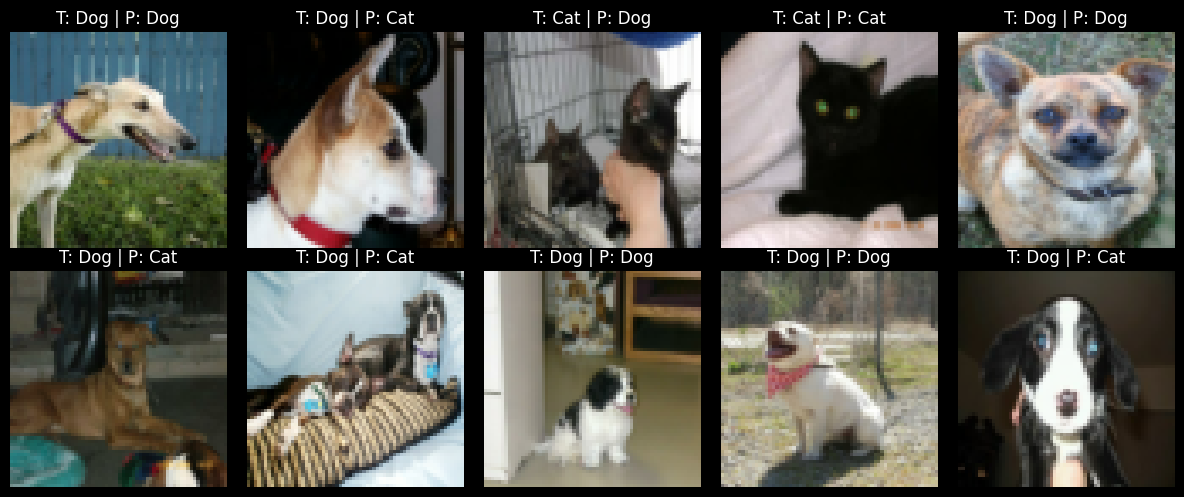

In [71]:
# display 10 random predictions
import random
indices = random.sample(range(len(xtest)) , 10)

fig , axes = plt.subplots(2 , 5 , figsize = (12 , 5))

for ax , ind in zip(axes.flatten() , indices):
    image = xtest[ind].reshape((64 , 64 , 3))
    tlabel = "Cat" if ytest[ind] == 0 else 'Dog'
    plabel = 'Cat' if ypred[ind] == 0 else 'Dog'
    ax.imshow(image)
    ax.set_title(f"T: {tlabel} | P: {plabel}")
    ax.axis('off')

plt.tight_layout()
plt.show()